# Audio: Wave - Spectorgram Conversion
![Getting Started](./images/WaveSpectrogramConversion.jpg)

In [1]:
import os
import librosa
import librosa.display
import IPython.display as ipd
import numpy as np
import matplotlib.pyplot as plt

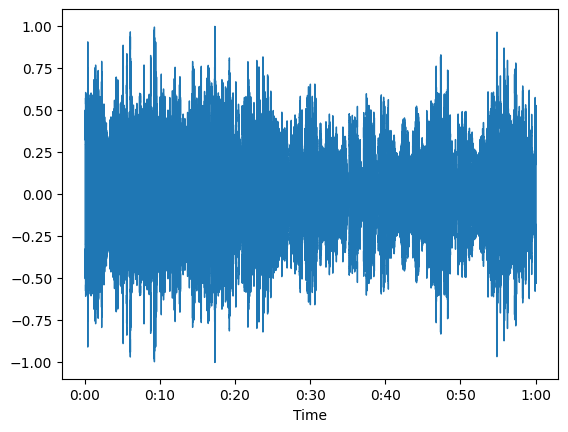

In [3]:
wav_file = "../data/audio/WaveSpectrogramConversion.wav"
signal, sr = librosa.load(wav_file)
librosa.display.waveshow(signal, sr=sr)
ipd.Audio(wav_file)

## Converting from Wave to Spectrogram
### Extracting Short-Time Fourier Transform

In [4]:
FRAME_SIZE = 2048
HOP_SIZE = 512
S_signal = librosa.stft(signal, n_fft=FRAME_SIZE, hop_length=HOP_SIZE)

### Calculating the Spectrogram

In [5]:
Y_signal = np.abs(S_signal) ** 2
Y_log_signal = librosa.power_to_db(Y_signal)

### Visualizing the Spectrogram

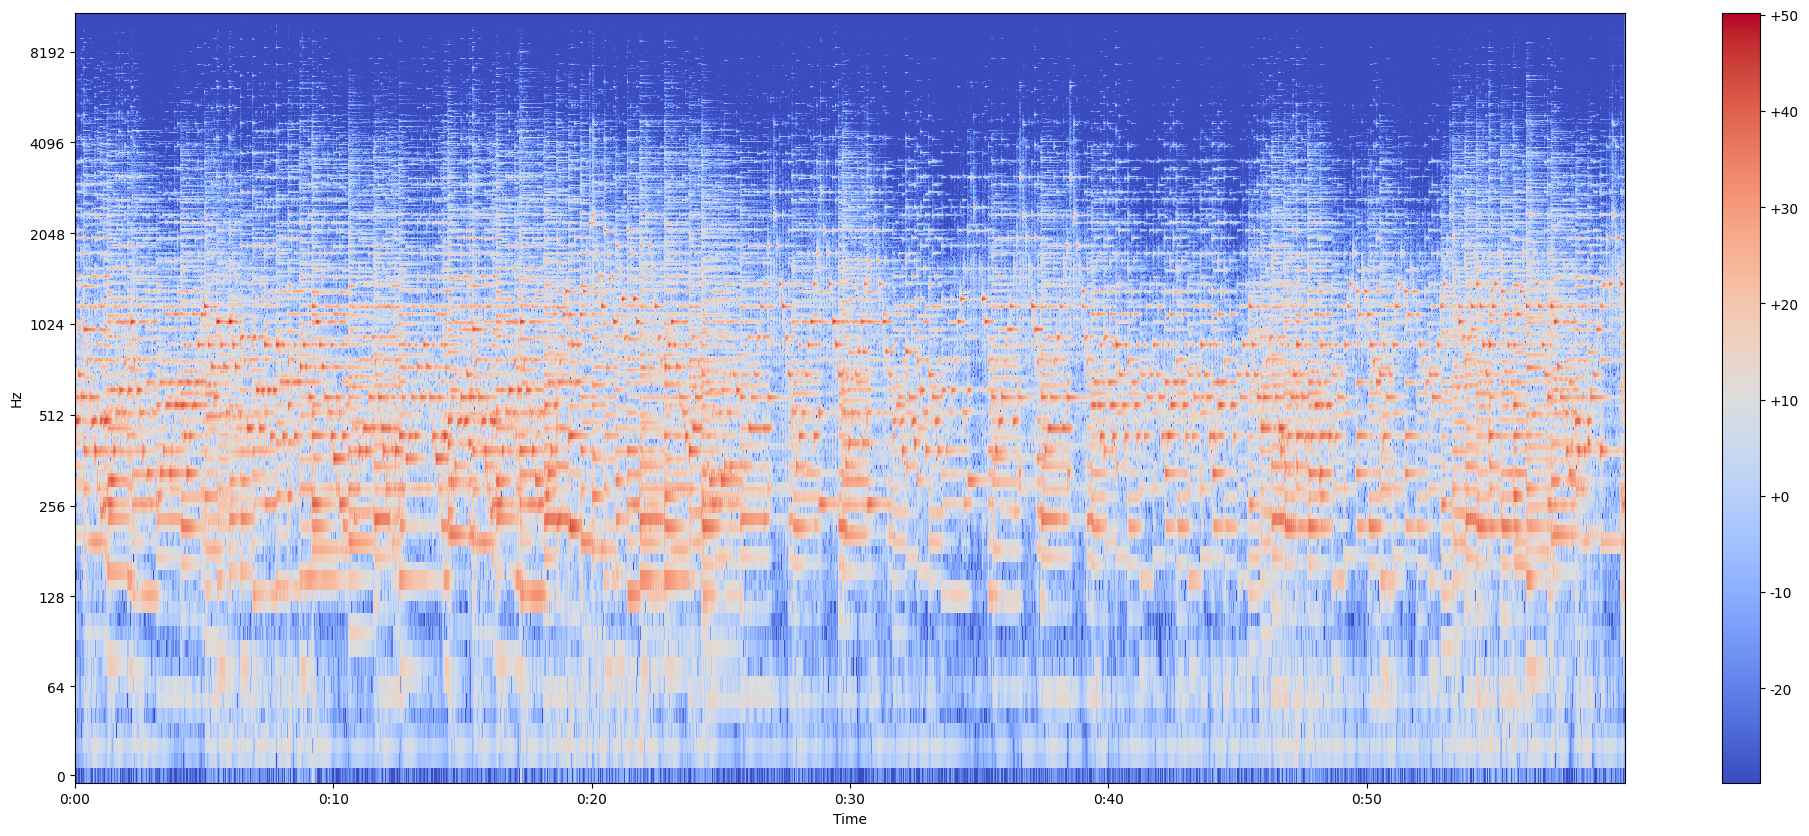

In [6]:
def plot_spectrogram(Y, sr, hop_length, y_axis="linear"):
    plt.figure(figsize=(25, 10))
    librosa.display.specshow(Y, 
                             sr=sr, 
                             hop_length=hop_length, 
                             x_axis="time", 
                             y_axis=y_axis)
    plt.colorbar(format="%+2.f")

# Log-Frequency Spectrogram
plot_spectrogram(Y_log_signal, sr, HOP_SIZE, y_axis="log")

## Converting Spectrogram to Wave

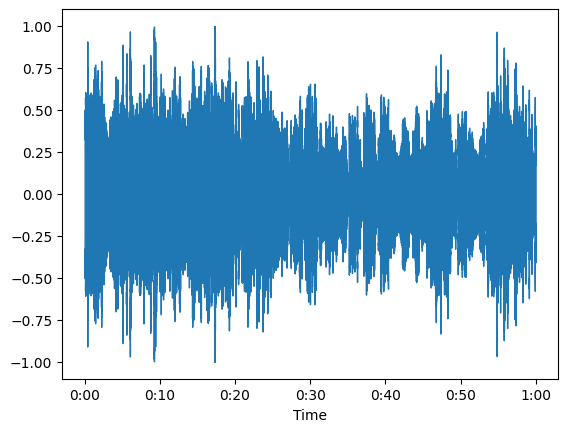

In [7]:
A_signal = librosa.istft(S_signal, hop_length=HOP_SIZE)
#librosa.display.waveshow(signal, sr=sr)
librosa.display.waveshow(A_signal, sr=sr)
ipd.Audio(A_signal,rate=sr)